In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ca_housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Data Cleaning

Total bedrooms has null values. Let's remove all the rows with null values (only a small proportion of the data so should be okay...) 

In [4]:
df = df.dropna(how='any',axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Removing Outliers

Removing rows that have columns of numerical variables with a standard deviation of 3 or more from the mean.

In [5]:
def remove_outliers(df, columns):
    std_dev_away = 3
    for column in columns:
        upper_limit = df[column].mean() + std_dev_away * df[column].std()
        lower_limit = df[column].mean() - std_dev_away * df[column].std()
        df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    return df

In [6]:
df = remove_outliers(df, ['longitude', 'latitude', 'housing_median_age', 
                          'total_rooms', 'total_bedrooms', 'population', 
                          'households', 'median_income', 'median_house_value'])

# Data Analysis

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

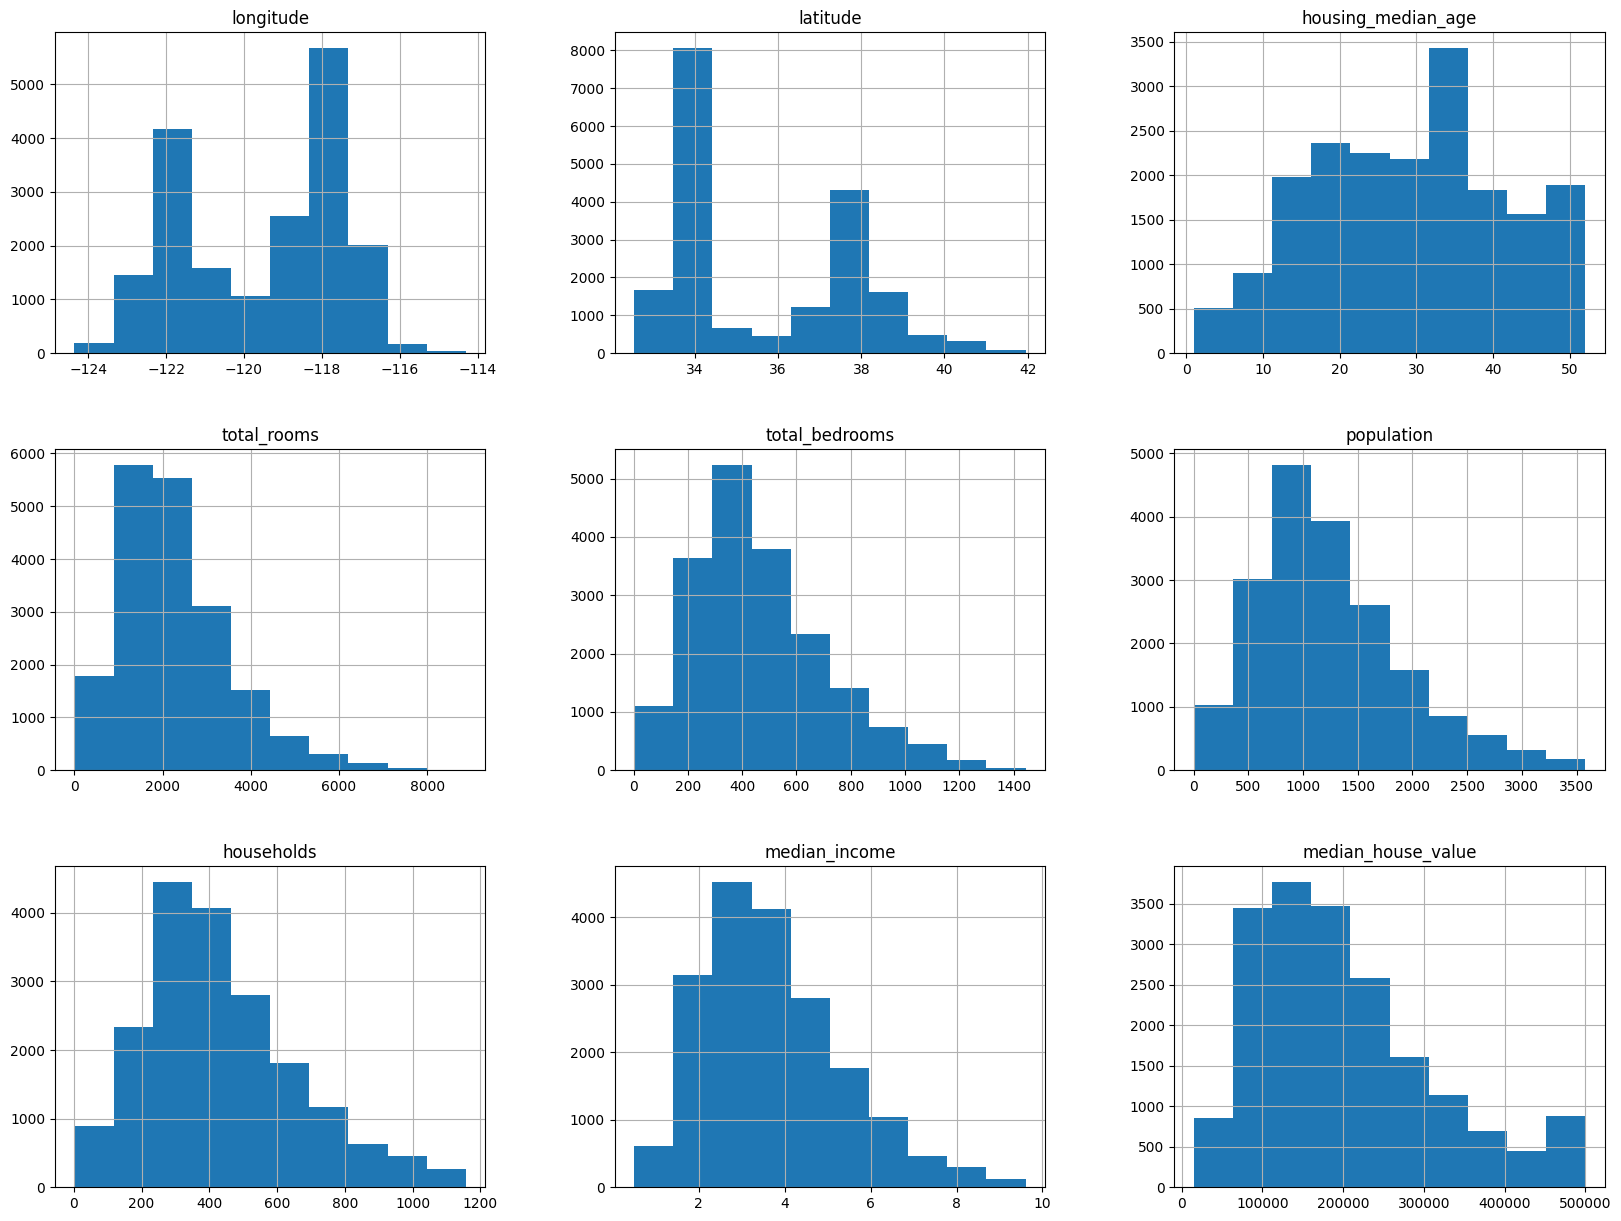

In [8]:
df.hist(figsize=(20, 15), bins=10)

Taking logarithm of skewed histograms to normalize data

In [9]:
df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

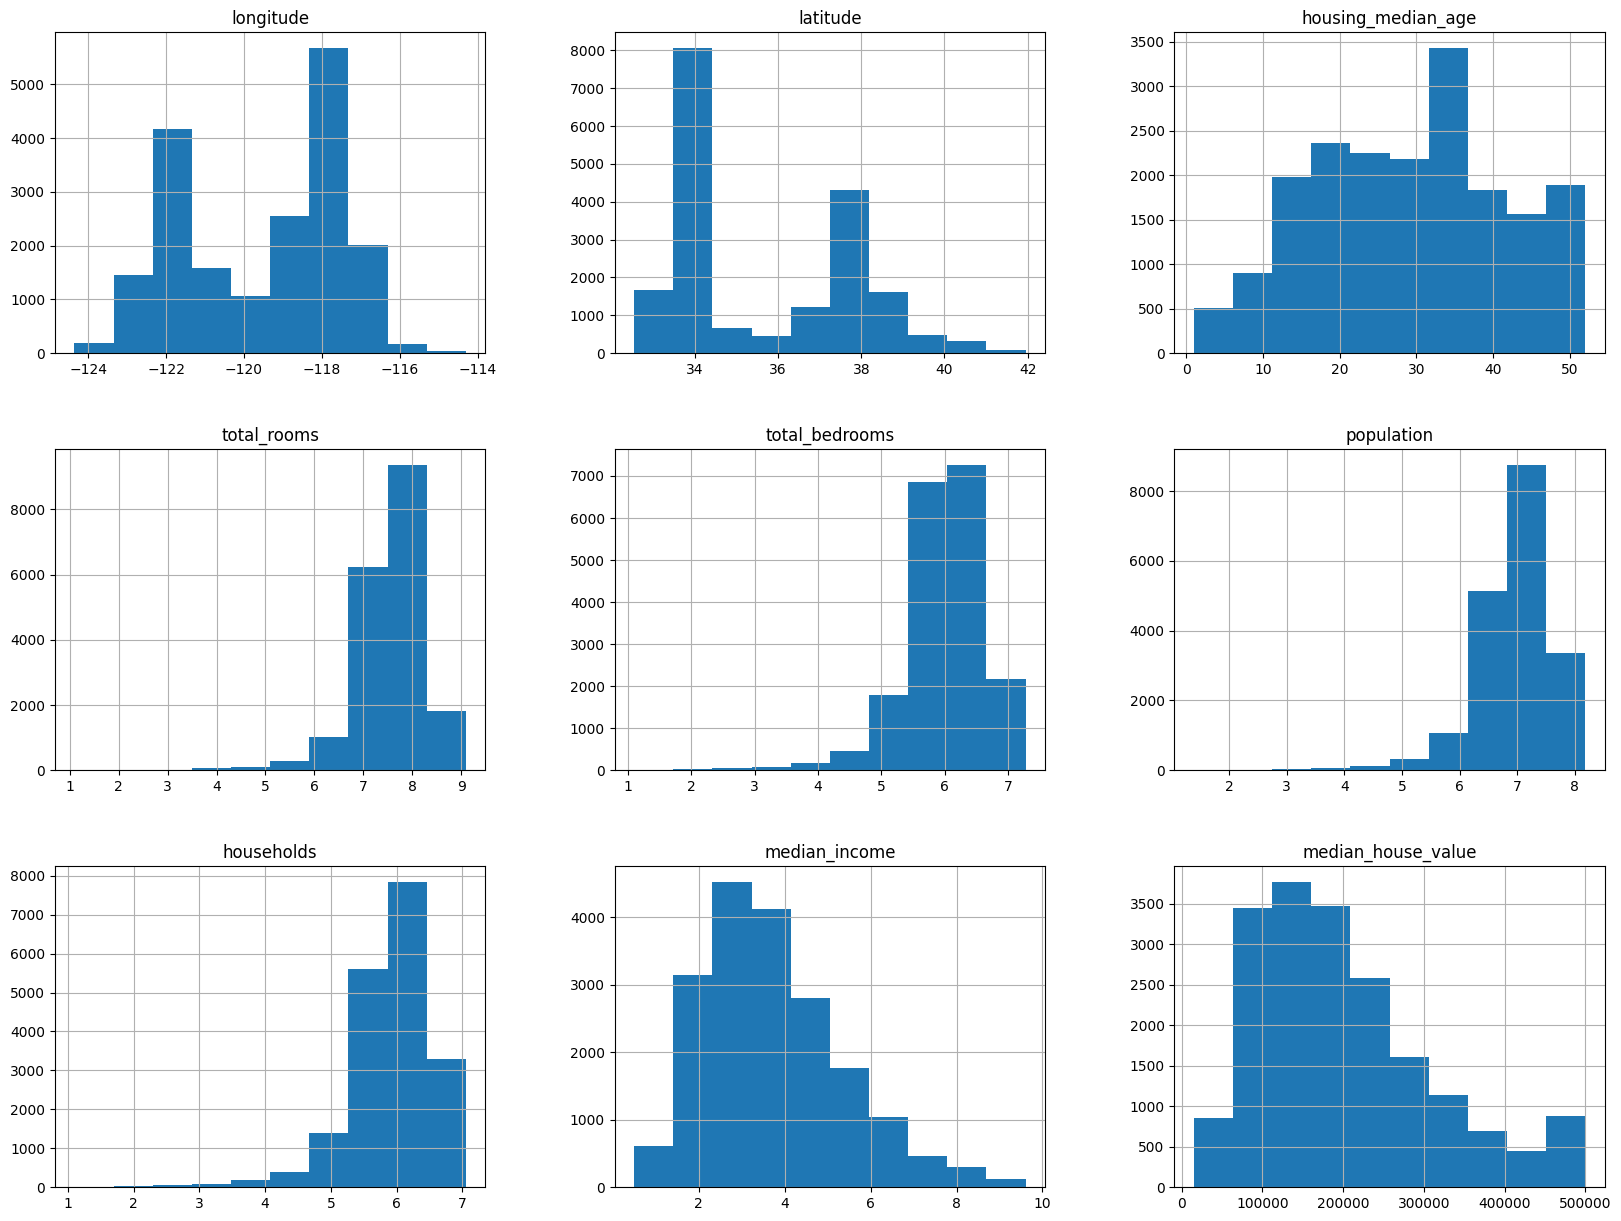

In [10]:
df.hist(figsize=(20, 15), bins = 10)

# Feature Engineering

<Axes: >

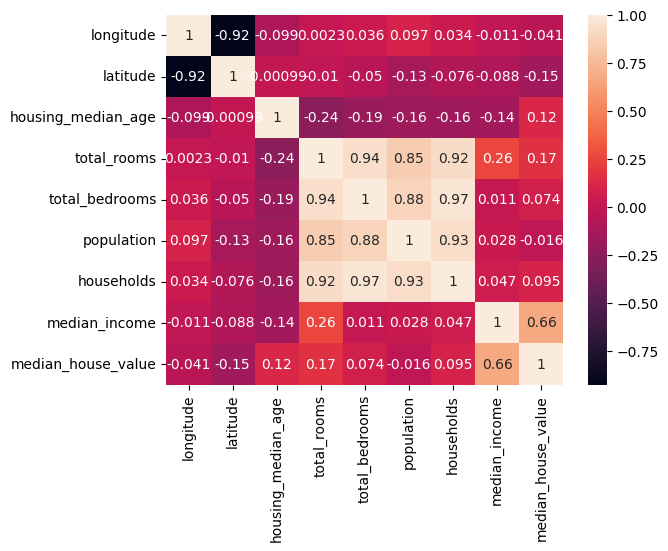

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Most important feature seems to be the median_income. Should develop more features from existing that seem to correlate well with median_house_value.

In [12]:
df['bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms'] # Ratio of bedrooms to total rooms
df['household_ratio'] = df['households'] / df['population'] # Ratio of households to population
df['room_ratio'] = df['total_rooms'] / df['households'] # Ratio of rooms to households

In [13]:
df = df.join(pd.get_dummies(df.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

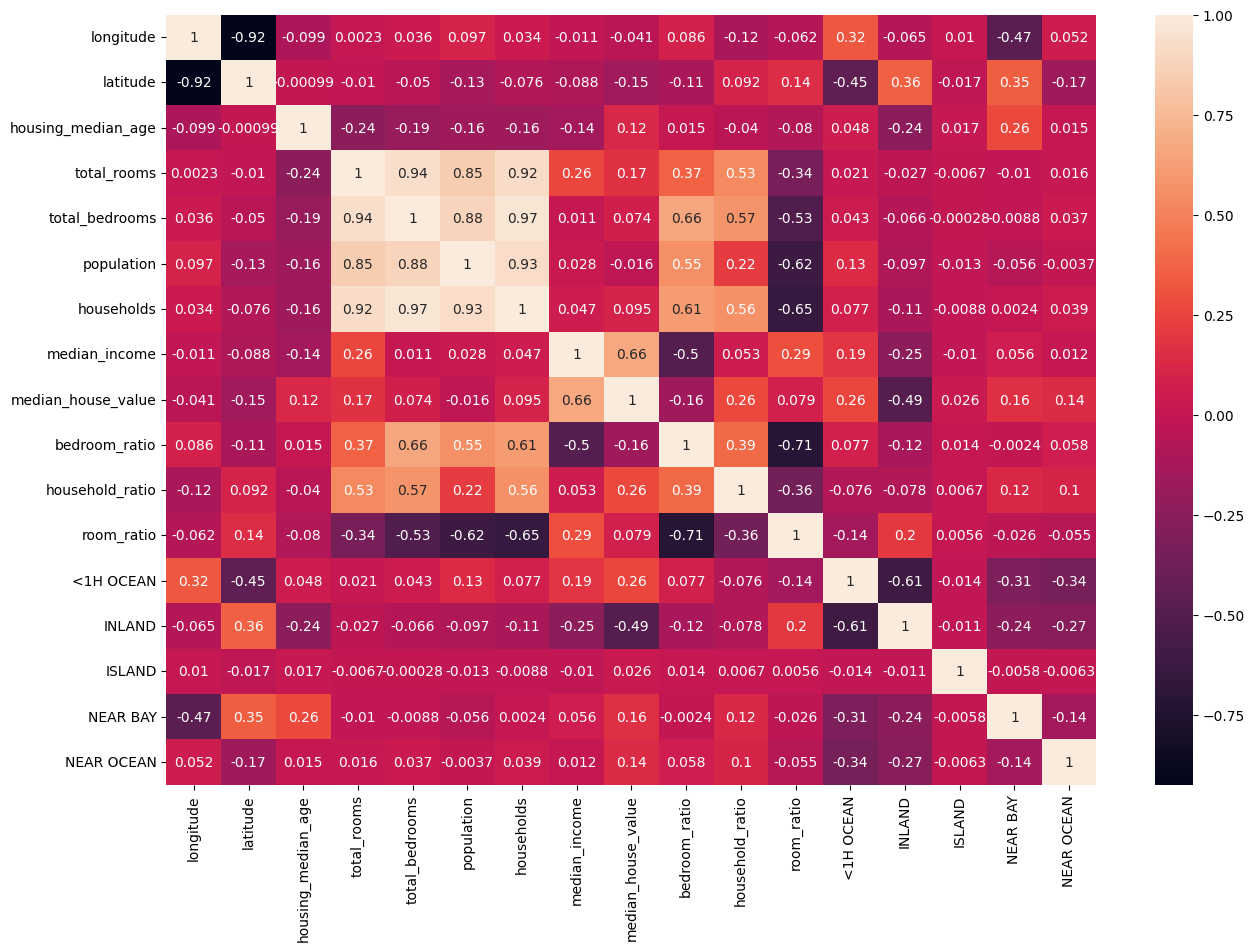

In [14]:
plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

Some of these features are more relevant than others. INLAND, <1H OCEAN, household_ratio and bedroom_ratio look like they have the most correlation with the model.

Maybe will look into more feature extraction...